# QUESTION 1

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
def load_and_preprocess_data():
     # Load MNIST dataset
     (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
     # Normalize pixel values
     x_train = x_train.astype('float32') / 255.0
     x_test = x_test.astype('float32') / 255.0
    
     # Reshape images to 1D arrays
     x_train = x_train.reshape(-1, 28*28)
     x_test = x_test.reshape(-1, 28*28)
    
     # One-hot encode labels
     y_train = tf.keras.utils.to_categorical(y_train, 10)
     y_test = tf.keras.utils.to_categorical(y_test, 10)
    
     return (x_train, y_train), (x_test, y_test)


In [3]:
def create_model():
     model = tf.keras.Sequential([
     tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(256, activation='relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(10, activation='softmax')
     ])
     model.compile(optimizer='adam',
     loss='categorical_crossentropy',
     metrics=['accuracy'])
    
     return model

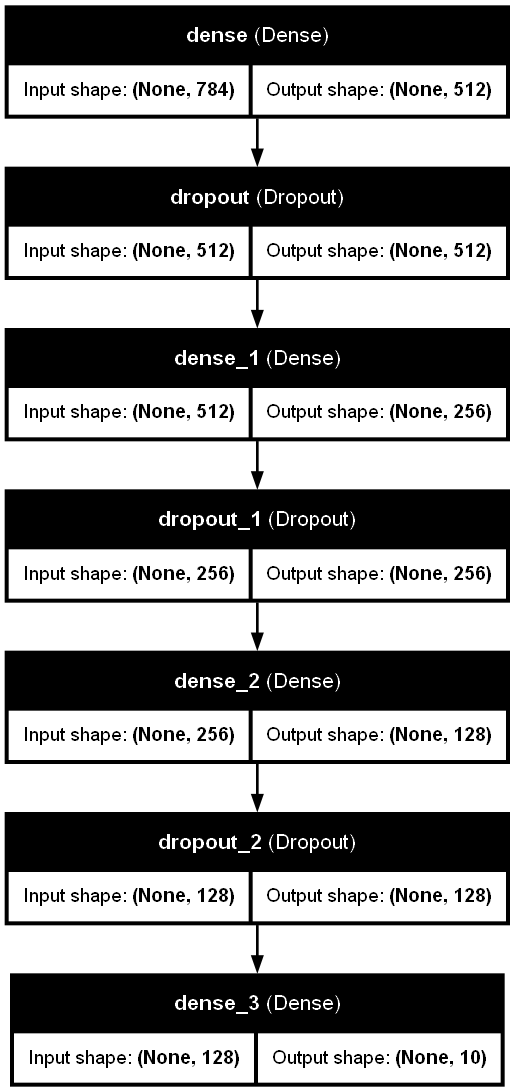

In [6]:
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model, to_file = "model.png",show_shapes=True,show_layer_names=True,rankdir="TB",expand_nested=False,dpi=96, )
from IPython.display import Image
Image('model.png')


In [4]:
def train(model, x_train, y_train, x_test, y_test):
     # Train the model
     history = model.fit(x_train, y_train,
     batch_size=128,
     epochs=20,
     validation_split=0.2,
     verbose=1)


In [5]:
(x_train, y_train), (x_test, y_test) =  load_and_preprocess_data()

model = create_model()
train(model,x_train, y_train, x_test, y_test)

C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8073 - loss: 0.6097 - val_accuracy: 0.9610 - val_loss: 0.1330
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9587 - loss: 0.1364 - val_accuracy: 0.9710 - val_loss: 0.0983
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9719 - loss: 0.0909 - val_accuracy: 0.9716 - val_loss: 0.0919
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9780 - loss: 0.0709 - val_accuracy: 0.9738 - val_loss: 0.0879
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9815 - loss: 0.0616 - val_accuracy: 0.9772 - val_loss: 0.0756
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9835 - loss: 0.0508 - val_accuracy: 0.9787 - val_loss: 0.0754
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9877 - loss: 0.0402 - val_accuracy: 0.9773 - val_loss: 0.0835
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9882 - loss: 0.0377 - val_

In [11]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# QUESTION 2

In [7]:
 def create_model_cifar():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    return model

In [8]:
def load_cifar():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() #load cifar
    return (x_train, y_train), (x_test, y_test)
def preprocess_data_cifar(x_train, y_train,x_test, y_test):
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape(-1, 32*32*3)
    x_test = x_test.reshape(-1, 32*32*3)
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
(x_train , y_train) , (x_test , y_test) = load_cifar()
(x_train , y_train) , (x_test , y_test) = preprocess_data_cifar(x_train, y_train,x_test, y_test)
cifar_model = create_model_cifar()
train(cifar_model , x_train , y_train , x_test , y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 333s 2us/step
Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.1914 - loss: 2.2083 - val_accuracy: 0.3319 - val_loss: 1.8537
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.3109 - loss: 1.8952 - val_accuracy: 0.3571 - val_loss: 1.7957
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.3344 - loss: 1.8361 - val_accuracy: 0.3513 - val_loss: 1.7862
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.3508 - loss: 1.7888 - val_accuracy: 0.3772 - val_loss: 1.7336
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.3647 - loss: 1.7573 - val_accuracy: 0.3981 - val_loss: 1.6695
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.3764 - loss: 1.7270 - val_accuracy: 0.3987 - val_loss: 1.6894
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.3869 - loss: 1.6913 - val_accuracy: 0.4222 - val_loss: 1.6402
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━